<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/17_Image_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Data Augmentation
* 원본 이미지에 적잘한 병형을 가해서 새로운 데이터를 만들어내는 방식

* 장점
  * 다양한 데이터를 입력시킴으로써 모델을 더욱 견고하게 만들어 주기 때문에 실제 데이터를 가지고 테스트 시에 더 높은 성능을 기대할 수 있음
  * CNN 모델을 학습 시키기에 수집된 데이터가 적은 경우에 강력한 힘을 발휘

*케라스에는 이미지 데이터 보강을 위한 ImageDataGenerator 제공

1. ImageDataGenerator 생성
  - gen=ImageDataGenerator(rotation_range=30,horizontal_flip=True,rescale=1./255)
  - Ex) 30도 이내에서 회전 , 좌우 반전시도, 색상의 최대값을 255로 나누어서 정규화

2. 이미지  로드 및 정규화
  - load_img() 또는 cifal10.load_data()이용 (데이터타입이 JpegimageFile임으로 img_to_array() 로 numpy 타입으러 변환)
  -1./255이용하여 0~1로 정규화

3. flow() 또는 flow_from_directory() 적용
  - data_gen=gen.flow(xdata,ydata,batch_size=...)
    - flow함수는 주어진 데이터에서 배치 사이즈에 지정된 개수만큼 무작위로 뽑아 변형을 가하라는 의미
  - data_gen=gen.flow_from_directory(xdata,ydata,batch_size=...,class_mode='...')
    - dir_path에서 배치사이즈만큼 읽어서 변형을 가하고,정답(label)은 dir_path의 하위 디렉토리 이름으로 인식되며 class_mode로 지정된,binary,sparse,categorical 같은 형태로 표현

4. next() 실행
  - img,label=data_gen.next()
    - next 함수 실행시 마다 함수에서 지정한 배치 사이즈만큼의 변형된 데이터와 정답이 리턴됨

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
gen=ImageDataGenerator(rotation_range=30,
                       width_shift_range=0.3,
                       shear_range=0.4,
                       horizontal_flip=True)

In [50]:
import cv2 as cv

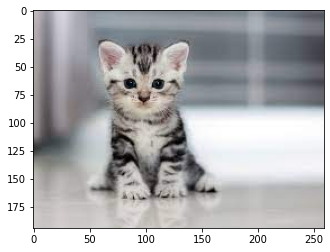

<class 'numpy.ndarray'>
(194, 259, 3)


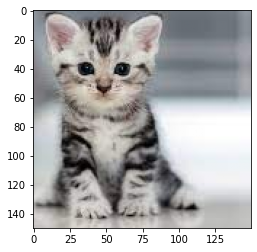

<class 'numpy.ndarray'>
(150, 150, 3)


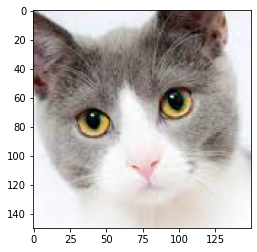

<class 'numpy.ndarray'>
(150, 150, 3)


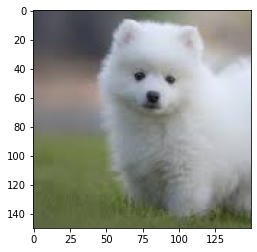

<class 'numpy.ndarray'>
(150, 150, 3)


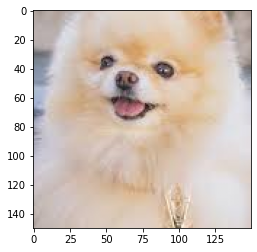

<class 'numpy.ndarray'>
(150, 150, 3)


In [75]:
img_array_list=[]
img_names=['/content/cat1.jpg','/content/cat2.jpg',
           '/content/dog1.jpg','/content/dog2.jpg']

#그냥 내용대로 load_img를 할 경우 실행이 되지 않앗습니다
#opencv2를 이용하여 사진을 열어서 행과열을 수정하였습니다
# 그냥 열었을 시에 타입과 행열에 대한 정보와
#각각 수정하고 연 데이터의 차이를 비교합니다
img=cv.imread(img_names[0])
imgrgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)/255.
img_array_list.append(imgrgb)
plt.imshow(imgrgb)
plt.show()
print(type(imgrgb))
print(imgrgb.shape)


for i in range(4):
  img=cv.imread(img_names[i])
  img=img[25:175,50:200]
  imgrgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)/255.
  img_array_list.append(imgrgb)
  plt.imshow(imgrgb)
  plt.show()

  print(type(imgrgb))
  print(imgrgb.shape)

In [70]:
data_gen=gen.flow(np.array(img_array_list),batch_size=2)

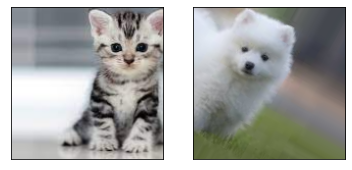

In [71]:
img=data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
  plt.subplot(1,len(img),i+1)
  plt.xticks([]);plt.yticks([])
  plt.imshow(img[i])

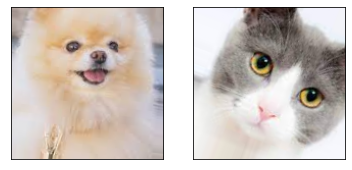

In [72]:
img=data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
  plt.subplot(1,len(img),i+1)
  plt.xticks([]);plt.yticks([])
  plt.imshow(img[i])

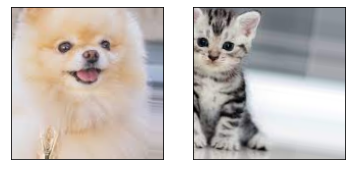

In [73]:
img=data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
  plt.subplot(1,len(img),i+1)
  plt.xticks([]);plt.yticks([])
  plt.imshow(img[i])

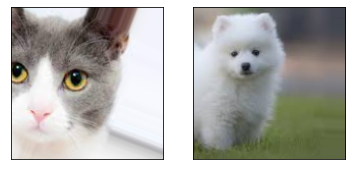

In [74]:
img=data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
  plt.subplot(1,len(img),i+1)
  plt.xticks([]);plt.yticks([])
  plt.imshow(img[i])